In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing


#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

# libraries for computation
import pandas as pd
import numpy as np

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#library for preprocessing
from sklearn.preprocessing import StandardScaler

#library for Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#Library for feature selection techniques
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

#libraries for various ML models 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor



#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Read Data from CSV

In [15]:
data = pd.read_csv('Poverty.csv')

In [16]:
data.head()

,Country or Area,Year,Value,Value Footnotes
0,Albania,2012,1.1,1.0
1,Albania,2008,0.4,1.0
2,Albania,2005,1.1,1.0
3,Albania,2002,2.0,1.0
4,Albania,1996,1.1,1.0


#### lets drop extra column Value Footnotes

In [17]:
# Read data from csv and print the head
data = data.drop(columns=['Value Footnotes'])
data.head(5)

,Country or Area,Year,Value
0,Albania,2012,1.1
1,Albania,2008,0.4
2,Albania,2005,1.1
3,Albania,2002,2.0
4,Albania,1996,1.1


#### Get data insights

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 3 columns):
Country or Area    1614 non-null object
Year               1614 non-null object
Value              1602 non-null float64
dtypes: float64(1), object(2)
memory usage: 37.9+ KB


#### it seems column Value has some missing values or NaN 

In [19]:
vals = data['Value']

In [20]:
d = data[ vals.isna() ]
d

,Country or Area,Year,Value
1602,footnoteSeqID,Footnote,NaN
1603,1,Estimated from unit-record consumption data.,NaN
1604,2,Estimated from grouped consumption data.,NaN
1605,3,Estimated from unit-record income data. Urban ...,NaN
1606,4,Estimated from grouped income data. Urban only...,NaN
1607,5,Estimated from unit-record income data.,NaN
1608,6,Estimated from grouped income data.,NaN
1609,7,Estimated from grouped consumption data. Natio...,NaN
1610,8,"Retrieved on Sept 19, 2018 from World Bank, Po...",NaN
1611,9,Estimated from unit-record consumption data. P...,NaN


##### lets drop this entries

In [22]:
data  = data [0:1602] 

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 3 columns):
Country or Area    1602 non-null object
Year               1602 non-null object
Value              1602 non-null float64
dtypes: float64(1), object(2)
memory usage: 37.6+ KB


### Lets normalize data

In [24]:
# Normalize the value column and drop old column

# Create x, where x the 'Value' column's values as floats
x = data[['Value']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized['normalized'] = pd.DataFrame(x_scaled)
df_normalized.drop(columns=0,inplace=True)

data_new = pd.concat([data,df_normalized ], axis=1)
data_new.drop(columns='Value',inplace=True)

In [25]:
# Check new dataframe with normalized value
data_new.head()

,Country or Area,Year,normalized
0,Albania,2012,0.011690
1,Albania,2008,0.004251
2,Albania,2005,0.011690
3,Albania,2002,0.021254
4,Albania,1996,0.011690


#### Using tsfresh to extract features from data

In [26]:
# Use TSFresh library to extract features from data 
from tsfresh import extract_features
extracted_features = extract_features(data_new, column_id="Country or Area", column_sort="Year")

Feature Extraction: 100%|██████████| 10/10 [00:10<00:00,  1.03it/s]


In [27]:
#Check extracted features
extracted_features.head()

variable,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,normalized__time_reversal_asymmetry_statistic__lag_1,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
Albania,0.000880,0.034006,-0.207301,-0.009288,0.123878,NaN,NaN,NaN,NaN,NaN,...,-0.000002,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000029,0.0
Algeria,0.008731,0.063762,-0.662088,-0.662088,0.236452,NaN,NaN,NaN,NaN,NaN,...,-0.000297,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000822,0.0
Angola,0.220140,0.023379,-1.000000,-1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000137,0.0
Argentina,0.063581,0.308183,0.080516,0.120244,0.337182,0.085724,-0.164281,-0.010627,0.063809,NaN,...,0.000003,1.680193e-08,0.000004,0.0,2.0,0.0,0.0,0.0,0.001046,0.0
Armenia,0.129814,0.243358,-0.419327,-0.443550,0.443094,0.205101,-1.000000,-0.180659,0.000000,NaN,...,-0.000626,-9.140289e-04,-0.000831,0.0,0.0,0.0,0.0,0.0,0.003868,0.0


In [28]:
#Check shape of new data with extracted features
extracted_features.shape

(175, 794)

In [29]:
#Check if any columns contains Nan values (null values)
list_cols_with_nan = extracted_features.columns[extracted_features.isna().any()].tolist()
len(list_cols_with_nan)

568

In [30]:
# it seems 568 columns out of 794 have some null values

In [31]:
#lets replace nan value with 0.0
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
data_after_impute = impute(extracted_features)

 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_tre

In [32]:
#lets check if any column has any nan value
list_cols_with_nan_after_impute = data_after_impute.columns[data_after_impute.isna().any()].tolist()
len(list_cols_with_nan_after_impute)

0

In [33]:
#we dont have any nan values 
# lets reset the index
data_after_impute = data_after_impute.reset_index()

In [34]:
# #Creating new Csv
# data_after_impute.to_csv('new.csv')

In [35]:
# # read from new csv file 
# df = pd.read_csv('new.csv')
# df.head()

In [36]:
# we need to give labels to countries 
data_countries = pd.read_excel('Developing countries.xlsx')

developed_countries = data_countries [data_countries['Value'] == 0]
developing_countries = data_countries [data_countries['Value'] == 1] 

list_developed_countries = developed_countries['Countries']
list_developing_countries = developing_countries['Countries']

list_developed_countries = list(list_developed_countries)
list_developing_countries = list(list_developing_countries)

data_after_impute['label'] = -1

for i,da in data_after_impute.iterrows():
    if da['id'] in list_developed_countries:
        val = 1
        data_after_impute.at[i,'label'] = val
    elif da['id'] in list_developing_countries:
        val = 0
        data_after_impute.at[i,'label'] = val

In [37]:
# check new df with added column as label 
data_after_impute.head()

variable,id,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation,label
0,Albania,0.000880,0.034006,-0.207301,-0.009288,0.123878,0.103082,-1.000000,-0.056323,0.000000,...,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000029,0.0,-1
1,Algeria,0.008731,0.063762,-0.662088,-0.662088,0.236452,0.103082,-1.000000,-0.056323,0.000000,...,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000822,0.0,0
2,Angola,0.220140,0.023379,-1.000000,-1.000000,0.000000,0.103082,-1.000000,-0.056323,0.000000,...,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000137,0.0,0
3,Argentina,0.063581,0.308183,0.080516,0.120244,0.337182,0.085724,-0.164281,-0.010627,0.063809,...,1.680193e-08,0.000004,0.0,2.0,0.0,0.0,0.0,0.001046,0.0,0
4,Armenia,0.129814,0.243358,-0.419327,-0.443550,0.443094,0.205101,-1.000000,-0.180659,0.000000,...,-9.140289e-04,-0.000831,0.0,0.0,0.0,0.0,0.0,0.003868,0.0,-1


In [38]:
#Split data into X(features),y 
y = data_after_impute['label']
X = data_after_impute.drop(columns=['id','label'])

In [39]:
y.value_counts()

 0    82
-1    60
 1    33
Name: label, dtype: int64

In [40]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [41]:
y_train.value_counts()

 0    47
-1    38
 1    20
Name: label, dtype: int64

#### Lets try different classifiers on the data

##### KNN

In [42]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

         -1       0.33      0.50      0.40        22
          0       0.60      0.51      0.55        35
          1       0.86      0.46      0.60        13

avg / total       0.56      0.50      0.51        70

Accuracy is:  0.5


###### KNN with k ranging from 1 to 15

[0.5142857142857142, 0.4, 0.5714285714285714, 0.42857142857142855, 0.5142857142857142, 0.4714285714285714, 0.45714285714285713, 0.4857142857142857, 0.5142857142857142, 0.5, 0.5857142857142857, 0.5142857142857142, 0.5, 0.5142857142857142, 0.44285714285714284]


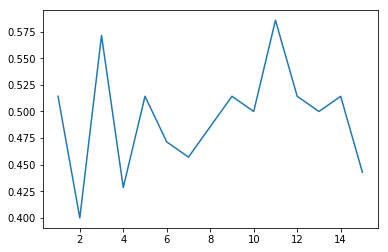

In [43]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,pred))
    
plt.plot(kVals,scores)    
print(scores)  

#### Random Forest Classifier

In [44]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6342242632483152
Accuracy Score:  0.6285714285714286


#### Fine tuninng Random Forest for different number of estimators

5-------0.6620908770538743
10-------0.6342242632483152
15-------0.6087517949610547
20-------0.6365051564335756
30-------0.6394823398535273
35-------0.6493697478991596
40-------0.6493697478991596
45-------0.6746894409937888
50-------0.6493697478991596
100-------0.6257379875026934
200-------0.66484593837535
300-------0.6265741079040311


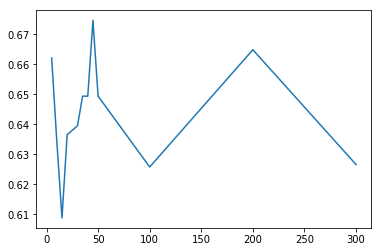

In [47]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
for i in range (0,len(estimators)):
    print(str(estimators[i]) + "-------" + str(f1_scores[i]))

#### Lets fine tune for number of features with best number of estimator from above analysis

In [48]:
rf_classifier = RandomForestClassifier(n_estimators=45, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6746894409937888
Accuracy Score:  0.6714285714285714


[0.6257379875026934, 0.6341556402780892, 0.6602939219960496, 0.6202380952380953, 0.5973411007738457, 0.6770184790334043, 0.6740505357526634, 0.6358406219630709, 0.5740723573299822, 0.6742222222222222, 0.662215320910973]


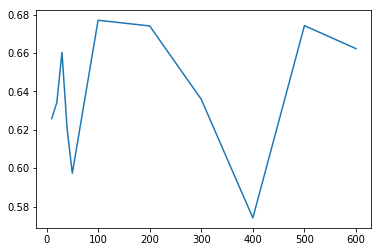

In [49]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    rf_classifier = RandomForestClassifier(max_features = e ,n_estimators=30,random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

#### Logistic regression model

In [50]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.5788293339313747
Accuracy Score:  0.5714285714285714


#### Extra tree classifier

In [51]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=5,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.48795732569317474
Accuracy Score:  0.4714285714285714


[0.48795732569317474, 0.4686433063791554, 0.5523956043956044, 0.5403076923076923, 0.5691277472527473, 0.6264001197963462, 0.6125362689878818, 0.614124683689901, 0.6003646563814866, 0.5923436041083099, 0.580257169369449, 0.5658730158730159]


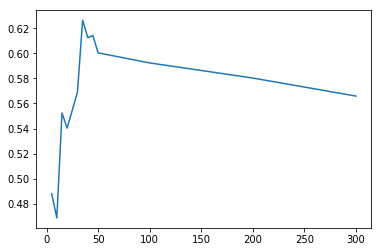

In [52]:
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    model = ExtraTreesClassifier(n_estimators=e,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [53]:
model = ExtraTreesClassifier(n_estimators=20,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.5403076923076923
Accuracy Score:  0.5285714285714286


#### fine tune for max_features

[0.5511864406779661, 0.523095238095238, 0.5953333333333333, 0.5406462585034013, 0.6358406219630709, 0.5260952380952381, 0.6137155075857856, 0.6145096283027317, 0.5568910256410257, 0.6135353535353535, 0.5599822631072631]


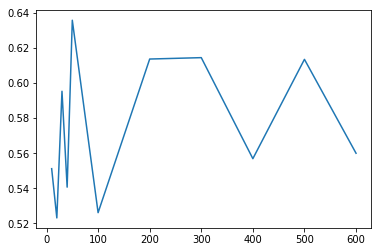

In [54]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    model = ExtraTreesClassifier(max_features=e,n_estimators=20,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

#### Recursive Feature Elimination 

In [55]:
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 365
Best features : Index(['normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_13__w_2',
       'normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_13__w_20',
       'normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_13__w_5',
       'normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_14__w_10',
       'normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_14__w_2',
       'normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_14__w_20',
       'normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_14__w_5',
       'normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_1__w_10',
       'normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_1__w_2',
       'normalized__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_1__w_20',
       ...
       'normalized__symmetry_looking__r_0.9',
       'normalized__symmetry_looking__r_0.9500000000000001',
       'normalized__time_reversal_asymmetry_statistic__lag_1'

In [57]:
cols = X_train.columns[rfecv.support_]

In [58]:
X = X[cols]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [60]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

         -1       0.35      0.59      0.44        22
          0       0.67      0.51      0.58        35
          1       0.50      0.23      0.32        13

avg / total       0.54      0.49      0.49        70

Accuracy is:  0.4857142857142857


[0.4142857142857143, 0.37142857142857144, 0.5428571428571428, 0.44285714285714284, 0.4714285714285714, 0.44285714285714284, 0.42857142857142855, 0.4714285714285714, 0.5285714285714286, 0.4857142857142857, 0.5285714285714286, 0.5142857142857142, 0.5142857142857142, 0.5142857142857142, 0.5857142857142857]


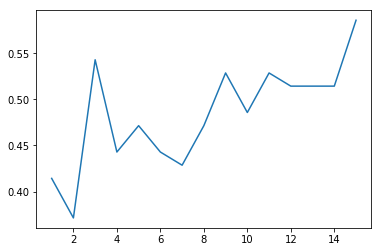

In [61]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,pred))
    
plt.plot(kVals,scores)    
print(scores) 

[0.6503878474466711, 0.6332531869527742, 0.5936428571428571, 0.5964285714285714, 0.5979368670545141, 0.650992137114586, 0.623032967032967, 0.6615524202694733, 0.6770184790334043, 0.6504615384615384, 0.6386277056277057, 0.6386277056277057]


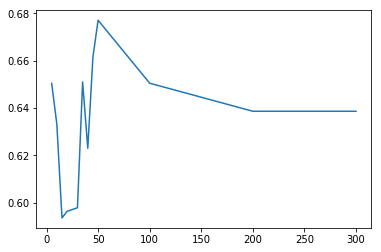

In [62]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [63]:
rf_classifier = RandomForestClassifier(n_estimators=30, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

         -1       0.38      0.50      0.43        22
          0       0.70      0.60      0.65        35
          1       0.82      0.69      0.75        13

avg / total       0.62      0.59      0.60        70

Accuracy is:  0.5857142857142857
